In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from insertion_sort import insertion_sort
from selection_sort import selection_sort
from heap_sort import heap_sort
from quick_sort import quick_sort
from merge_sort import merge_sort
from bucket_sort import bucket_sort

In [4]:
def measure_times(a_sort, power_range=(2, 12), n_loop=200, max_int=10000, duplication=False, is_sorted=False, num_swaps=0):
    times = []
    for p in power_range:
        n = 2**p
        
        print("n=" + str(n) + " started...", end="")
        
        if duplication:
            # each array has 100 same values on average
            arrays = [list(np.random.randint(0, (n//100)+1, n)) for _ in range(n_loop)] 
        else:
            arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
        
        if is_sorted:
            for array in arrays:
                array.sort()
            if num_swaps != 0:
                for array in arrays:
                    for _ in range(num_swaps):
                        i1, i2 = np.random.choice(n, 2)
                        array[i1], array[i2] = array[i2], array[i1]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [5]:
# preparation for fitting
from scipy.optimize import curve_fit
def n1_func(n, a):
    return a * n
def n2_func(n, a):
    return a * n**2
def nlogn_func(n, a):
    return a * n * np.log2(n)

In [6]:
power_range = range(8, 15)
ns = np.array([2**p for p in power_range])
n_loop = 50
max_int = 10000

sorts = [
    {
        'label': 'selection',
        'sort': selection_sort,
        'color': '#DA0017',
        'marker': 'o',
        'fit_func': n2_func
    },
    {
        'label': 'insertion',
        'sort': insertion_sort,
        'color': '#2C6AAB',
        'marker': '^',
        'fit_func': n2_func
    },
    {
        'label': 'heap',
        'sort': heap_sort,
        'color': '#40A43A',
        'marker': 'v',
        'fit_func': nlogn_func
    },
    {
        'label': 'quick',
        'sort': quick_sort,
        'color': '#863693',
        'marker': 's',
        'fit_func': nlogn_func
    },
    {
        'label': 'merge',
        'sort': merge_sort,
        'color': '#FE6B06',
        'marker': '*',
        'fit_func': nlogn_func
    },
    {
        'label': 'bucket',
        'sort': bucket_sort,
        'color': '#754239',
        'marker': '+',
        'fit_func': n1_func
    }
]

In [7]:
times_all = {}
for sort in sorts:
    print(sort['label'])
    times_all[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop)

selection
n=256 started...finished! time: 3.099355697631836 ms.
n=512 started...finished! time: 12.46133804321289 ms.
n=1024 started...finished! time: 55.57253837585449 ms.
n=2048 started...finished! time: 218.5306453704834 ms.
n=4096 started...finished! time: 777.3082399368286 ms.
n=8192 started...finished! time: 3236.3666200637817 ms.
n=16384 started...finished! time: 13385.37395954132 ms.
insertion
n=256 started...finished! time: 4.721741676330566 ms.
n=512 started...finished! time: 20.391626358032227 ms.
n=1024 started...finished! time: 85.85785865783691 ms.
n=2048 started...finished! time: 373.4603214263916 ms.
n=4096 started...finished! time: 1509.7001838684082 ms.
n=8192 started...finished! time: 6500.75662612915 ms.
n=16384 started...finished! time: 25925.932683944702 ms.
heap
n=256 started...finished! time: 1.4320611953735352 ms.
n=512 started...finished! time: 3.3144760131835938 ms.
n=1024 started...finished! time: 9.897642135620117 ms.
n=2048 started...finished! time: 16.544

In [25]:
# linear plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
plt.legend()

KeyError: 'selection'

In [23]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

KeyError: 'selection'

In [9]:
ns_fit = []
for p in power_range:
    for pp in range(10):
        ns_fit.append(2**(p+0.1*pp))
        
fit_params = {}
for sort in sorts:
    fit_params[sort['label']], _ = curve_fit(sort['fit_func'], ns, times_all[sort['label']])

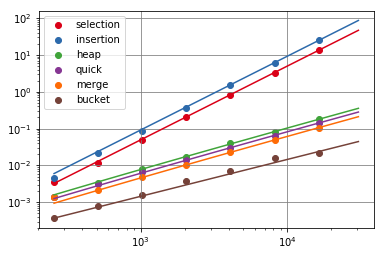

In [10]:
# log plot with fitting curve
for sort in sorts:
    plt.scatter(ns, times_all[sort['label']], label=sort['label'], color=sort['color'])
    plt.plot(ns_fit, sort['fit_func'](np.array(ns_fit), fit_params[sort['label']][0]), color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [12]:
times_all_duplicate = {}
for sort in sorts:
    print(sort['label'])
    times_all_duplicate[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, duplication=True)

selection
n=256 started...finished! time: 3.1452226638793945 ms.
n=512 started...finished! time: 11.763219833374023 ms.
n=1024 started...finished! time: 46.14311695098877 ms.
n=2048 started...finished! time: 194.53684329986572 ms.
n=4096 started...finished! time: 813.5954999923706 ms.
n=8192 started...finished! time: 3286.498441696167 ms.
n=16384 started...finished! time: 13834.37445640564 ms.
insertion
n=256 started...finished! time: 3.110060691833496 ms.
n=512 started...finished! time: 17.82832145690918 ms.
n=1024 started...finished! time: 82.47236251831055 ms.
n=2048 started...finished! time: 354.4714403152466 ms.
n=4096 started...finished! time: 1504.2974948883057 ms.
n=8192 started...finished! time: 6116.822075843811 ms.
n=16384 started...finished! time: 24790.163741111755 ms.
heap
n=256 started...finished! time: 0.9900569915771485 ms.
n=512 started...finished! time: 2.817397117614746 ms.
n=1024 started...finished! time: 7.098102569580078 ms.
n=2048 started...finished! time: 16.29

In [ ]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_duplicate[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-4, 80)
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [14]:
times_all_sorted = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True)

selection
n=256 started...finished! time: 4.10736083984375 ms.
n=512 started...finished! time: 16.643319129943848 ms.
n=1024 started...finished! time: 68.0473804473877 ms.
n=2048 started...finished! time: 277.1871566772461 ms.
n=4096 started...finished! time: 1131.5606355667114 ms.
n=8192 started...finished! time: 4380.360221862793 ms.
n=16384 started...finished! time: 17417.98002243042 ms.
insertion
n=256 started...finished! time: 0.11813640594482422 ms.
n=512 started...finished! time: 0.2982187271118164 ms.
n=1024 started...finished! time: 0.5655813217163086 ms.
n=2048 started...finished! time: 1.2492609024047852 ms.
n=4096 started...finished! time: 2.3715972900390625 ms.
n=8192 started...finished! time: 5.228424072265625 ms.
n=16384 started...finished! time: 10.074100494384766 ms.
heap
n=256 started...finished! time: 1.5138769149780273 ms.
n=512 started...finished! time: 3.6110782623291016 ms.
n=1024 started...finished! time: 8.33439826965332 ms.
n=2048 started...finished! time: 17.

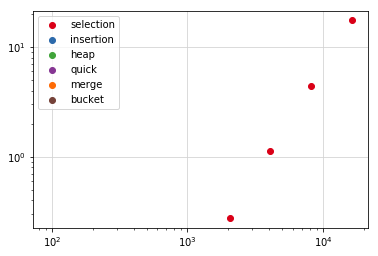

In [15]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [16]:
times_all_sorted_swaped = {}
for sort in sorts:
    print(sort['label'])
    times_all_sorted_swaped[sort['label']] = measure_times(sort['sort'], power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=4)

selection
n=256 started...finished! time: 3.489999771118164 ms.
n=512 started...finished! time: 14.238901138305664 ms.
n=1024 started...finished! time: 57.92037487030029 ms.
n=2048 started...finished! time: 235.29816150665283 ms.
n=4096 started...finished! time: 953.993182182312 ms.
n=8192 started...finished! time: 3790.5732583999634 ms.
n=16384 started...finished! time: 15912.280678749084 ms.
insertion
n=256 started...finished! time: 0.3710746765136719 ms.
n=512 started...finished! time: 0.7790660858154297 ms.
n=1024 started...finished! time: 2.1467971801757812 ms.
n=2048 started...finished! time: 3.9846420288085938 ms.
n=4096 started...finished! time: 6.548018455505371 ms.
n=8192 started...finished! time: 13.889298439025879 ms.
n=16384 started...finished! time: 27.628655433654785 ms.
heap
n=256 started...finished! time: 1.7522001266479492 ms.
n=512 started...finished! time: 3.6111974716186523 ms.
n=1024 started...finished! time: 8.76380443572998 ms.
n=2048 started...finished! time: 1

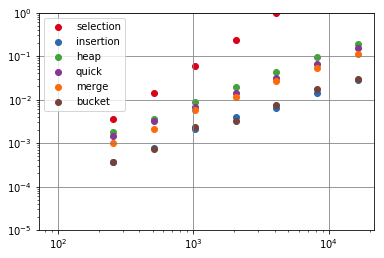

In [17]:
# log plot
for sort in sorts:
    plt.scatter(ns, times_all_sorted_swaped[sort['label']], label=sort['label'], color=sort['color'])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-5, 1)
plt.grid(which='major', color='grey', linestyle='-')
plt.legend()

In [18]:
times_all_num_swaps = {}
for num_swaps in [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]:
    print(num_swaps)
    times_all_num_swaps[num_swaps] = measure_times(insertion_sort, power_range=power_range, n_loop=n_loop, is_sorted=True, num_swaps=num_swaps)

0
n=256 started...finished! time: 0.16357898712158203 ms.
n=512 started...finished! time: 0.2746009826660156 ms.
n=1024 started...finished! time: 1.1417198181152344 ms.
n=2048 started...finished! time: 1.1985588073730469 ms.
n=4096 started...finished! time: 2.535281181335449 ms.
n=8192 started...finished! time: 5.981459617614746 ms.
n=16384 started...finished! time: 9.662818908691406 ms.
1
n=256 started...finished! time: 0.16510009765625 ms.
n=512 started...finished! time: 0.3735637664794922 ms.
n=1024 started...finished! time: 0.7916593551635742 ms.
n=2048 started...finished! time: 1.7834806442260742 ms.
n=4096 started...finished! time: 3.543062210083008 ms.
n=8192 started...finished! time: 8.213763236999512 ms.
n=16384 started...finished! time: 15.192842483520508 ms.
3
n=256 started...finished! time: 0.33797740936279297 ms.
n=512 started...finished! time: 0.7132816314697266 ms.
n=1024 started...finished! time: 1.530137062072754 ms.
n=2048 started...finished! time: 3.165755271911621 m

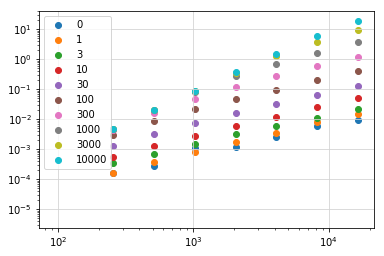

In [26]:
# log plot
for num_swaps in times_all_num_swaps.keys():
    plt.scatter(ns, times_all_num_swaps[num_swaps], label=num_swaps)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.legend()

In [20]:
def measure_times_for_small(a_sort, n_range=(2, 12, 2), n_loop=1000, max_int=100):
    times = []
    for n in n_range:
        print("n=" + str(n) + " started...", end="")
        
        arrays = [list(np.random.randint(0, max_int+1, n)) for _ in range(n_loop)]
                        
        start_time = time.time()
        for array in arrays:
            a_sort(array)
        averaged_time = (time.time() - start_time) / n_loop
        times.append(averaged_time)
        print("finished! time: " + str(averaged_time * 1000) + " ms.")
    
    return times

In [21]:
times_all_small = {}
n_range = range(2, 16, 2)
n_loop = 100000
for sort in sorts:
    print(sort['label'])
    times_all_small[sort['label']] = measure_times_for_small(sort['sort'], n_range=n_range, n_loop=n_loop)

selection
n=2 started...finished! time: 0.0012812304496765136 ms.
n=4 started...finished! time: 0.0029561686515808105 ms.
n=6 started...finished! time: 0.0050180768966674805 ms.
n=8 started...finished! time: 0.007470731735229492 ms.
n=10 started...finished! time: 0.01031637191772461 ms.
n=12 started...finished! time: 0.01329387903213501 ms.
n=14 started...finished! time: 0.016822760105133058 ms.
insertion
n=2 started...finished! time: 0.0011018013954162598 ms.
n=4 started...finished! time: 0.0027507710456848144 ms.
n=6 started...finished! time: 0.004907419681549073 ms.
n=8 started...finished! time: 0.007589590549468994 ms.
n=10 started...finished! time: 0.011013879776000976 ms.
n=12 started...finished! time: 0.014955239295959473 ms.
n=14 started...finished! time: 0.01935028076171875 ms.
heap
n=2 started...finished! time: 0.0025208187103271484 ms.
n=4 started...finished! time: 0.006280930042266846 ms.
n=6 started...finished! time: 0.010896823406219483 ms.
n=8 started...finished! time: 0

(0.0, 5e-05)

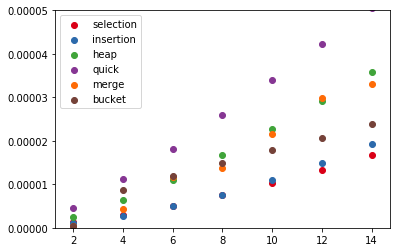

In [22]:
# linear plot
for sort in sorts:
    plt.scatter(n_range, times_all_small[sort['label']], label=sort['label'], color=sort['color'])
plt.legend()
plt.ylim(0.0, 0.00005)